# Generate stitchiing list

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from natsort import natsorted


In [2]:
input_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-03-22-Mingrui-PFC-test/documents'
maf_files = natsorted([f for f in os.listdir(input_path) if f.endswith('.maf')])
maf_files

['sample1.maf',
 'sample2.maf',
 'sample3.maf',
 'sample4.maf',
 'sample5.maf',
 'sample6.maf']

In [3]:
def generate_stitching_order(maf_file_path, output_path):
    
    df = pd.read_xml(maf_file_path)
    df = df.loc[:, ["StageXPos", "StageYPos", "PositionID", "Sections"]]
    n_layers = df['Sections'].max()

    # get the steps 
    temp = df['StageYPos'].shift(-1) - df['StageYPos']
    step = pd.value_counts(temp).index.values[0]
    
    # get the relative positions
    point_relative_min = [df.loc[:,'StageXPos'].min(), df.loc[:,'StageYPos'].min()]
    point_relative_max = [df.loc[:,'StageXPos'].max(), df.loc[:,'StageYPos'].max()]
    coo_shape = np.array(point_relative_max) - np.array(point_relative_min)
    coo_shape = (coo_shape / step + 0.5 + 1).astype(int)
    df['relative_x'] = np.array((df['StageXPos'] - point_relative_min[0])/step + 0.5, dtype=int)
    df['relative_y'] = np.array((df['StageYPos'] - point_relative_min[1])/step + 0.5, dtype=int)
    df = df.loc[:, ['PositionID', 'relative_x', 'relative_y']]
    
    # construct coo matrix
    value = df.loc[:,'PositionID'].values
    row = df.loc[:,'relative_y'].values
    col = df.loc[:,'relative_x'].values
    matrix_shape = [coo_shape[1], coo_shape[0]]

    ordering_matrix = coo_matrix((value, (row,col)), shape=matrix_shape).toarray()

    ## Warning 
    # ordering_matrix = np.rot90(ordering_matrix)
    # ordering_matrix = np.flip(ordering_matrix, axis=1)
    
    ordering_df = pd.DataFrame(ordering_matrix)
    ordering_list = ordering_df.unstack(1)
    output_df = pd.DataFrame(ordering_list)
    output_df = output_df.reset_index()
    output_df.columns = ["col", "row", "id"]
    output_df['grid'] = "tile_" + output_df['row'].astype(str) + "_" + output_df['col'].astype(str)

    fig, ax = plt.subplots(figsize=(max(col), max(row)))
    plt.imshow(ordering_matrix > 0)
    plt.xticks(np.arange(-0.5, max(col)+0.5, 1.0))
    plt.yticks(np.arange(-0.5, max(row)+0.5, 1.0))
    plt.grid()
    
    for i in range(output_df.shape[0]):
        plt.text(output_df.iloc[i, 0]-0.1, output_df.iloc[i, 1]-0.1, output_df.iloc[i, 2], color='blue', size=10)
        plt.text(output_df.iloc[i, 0]-0.25, output_df.iloc[i, 1]+0.1, output_df.iloc[i, 3], color='blue', size=10)

    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path))
    plt.show()

    return output_df, n_layers

  0%|          | 0/6 [00:00<?, ?it/s]

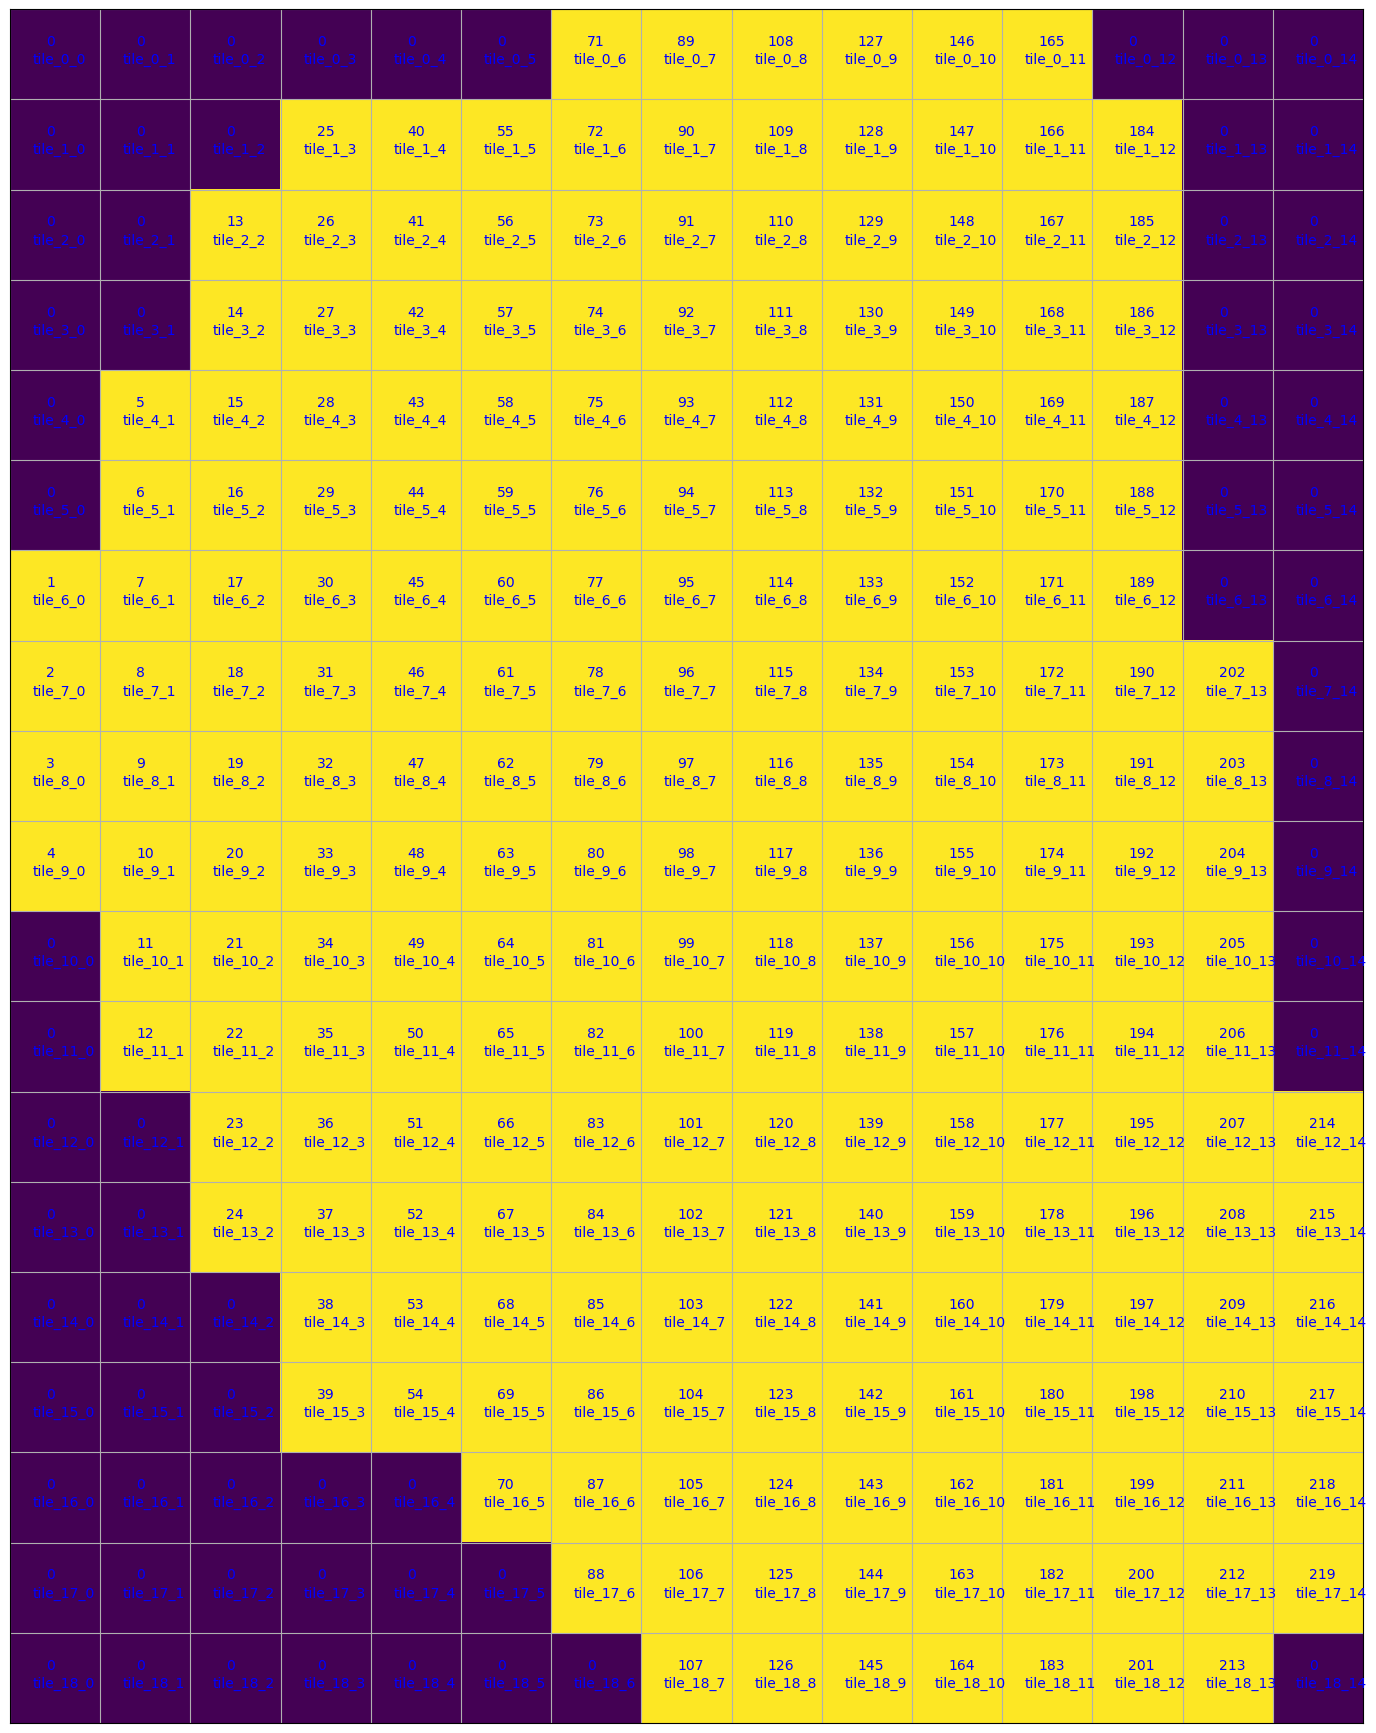

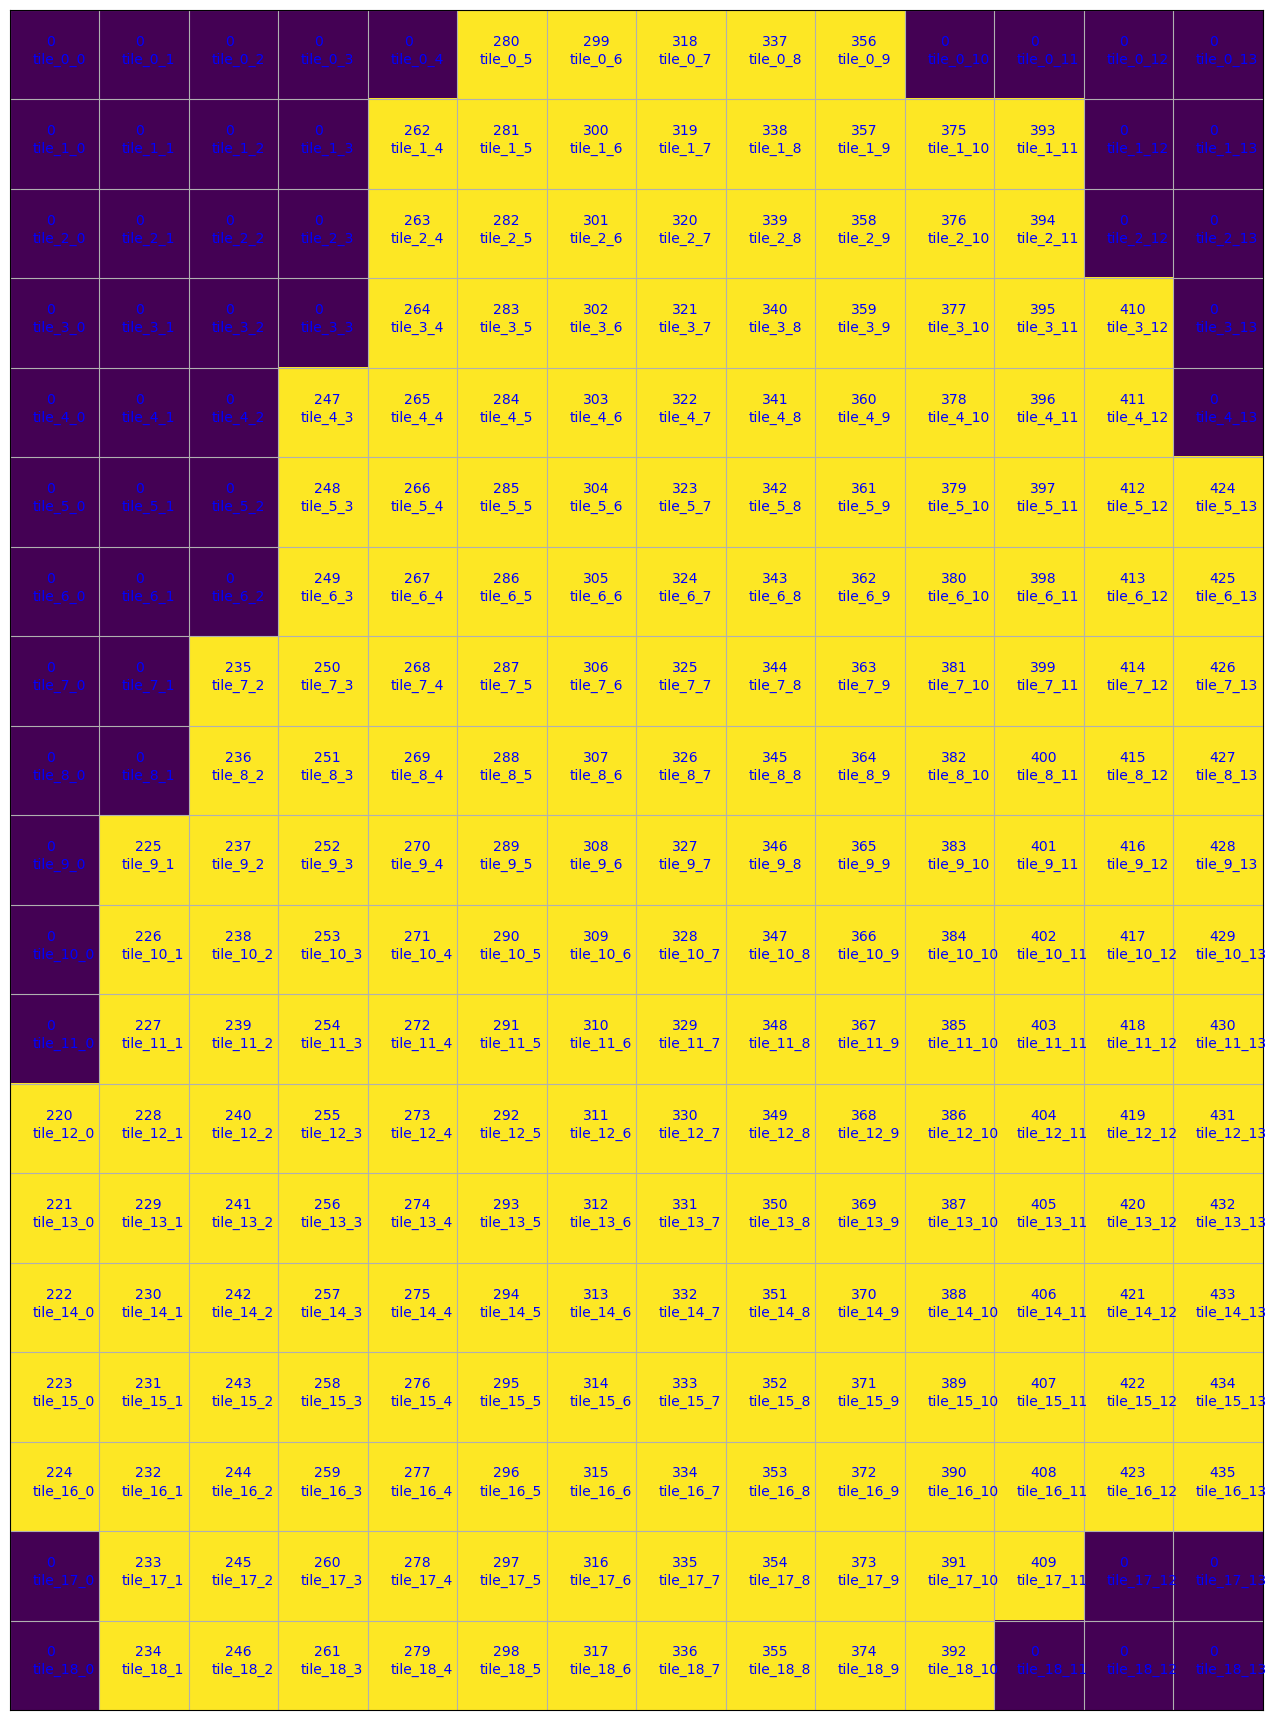

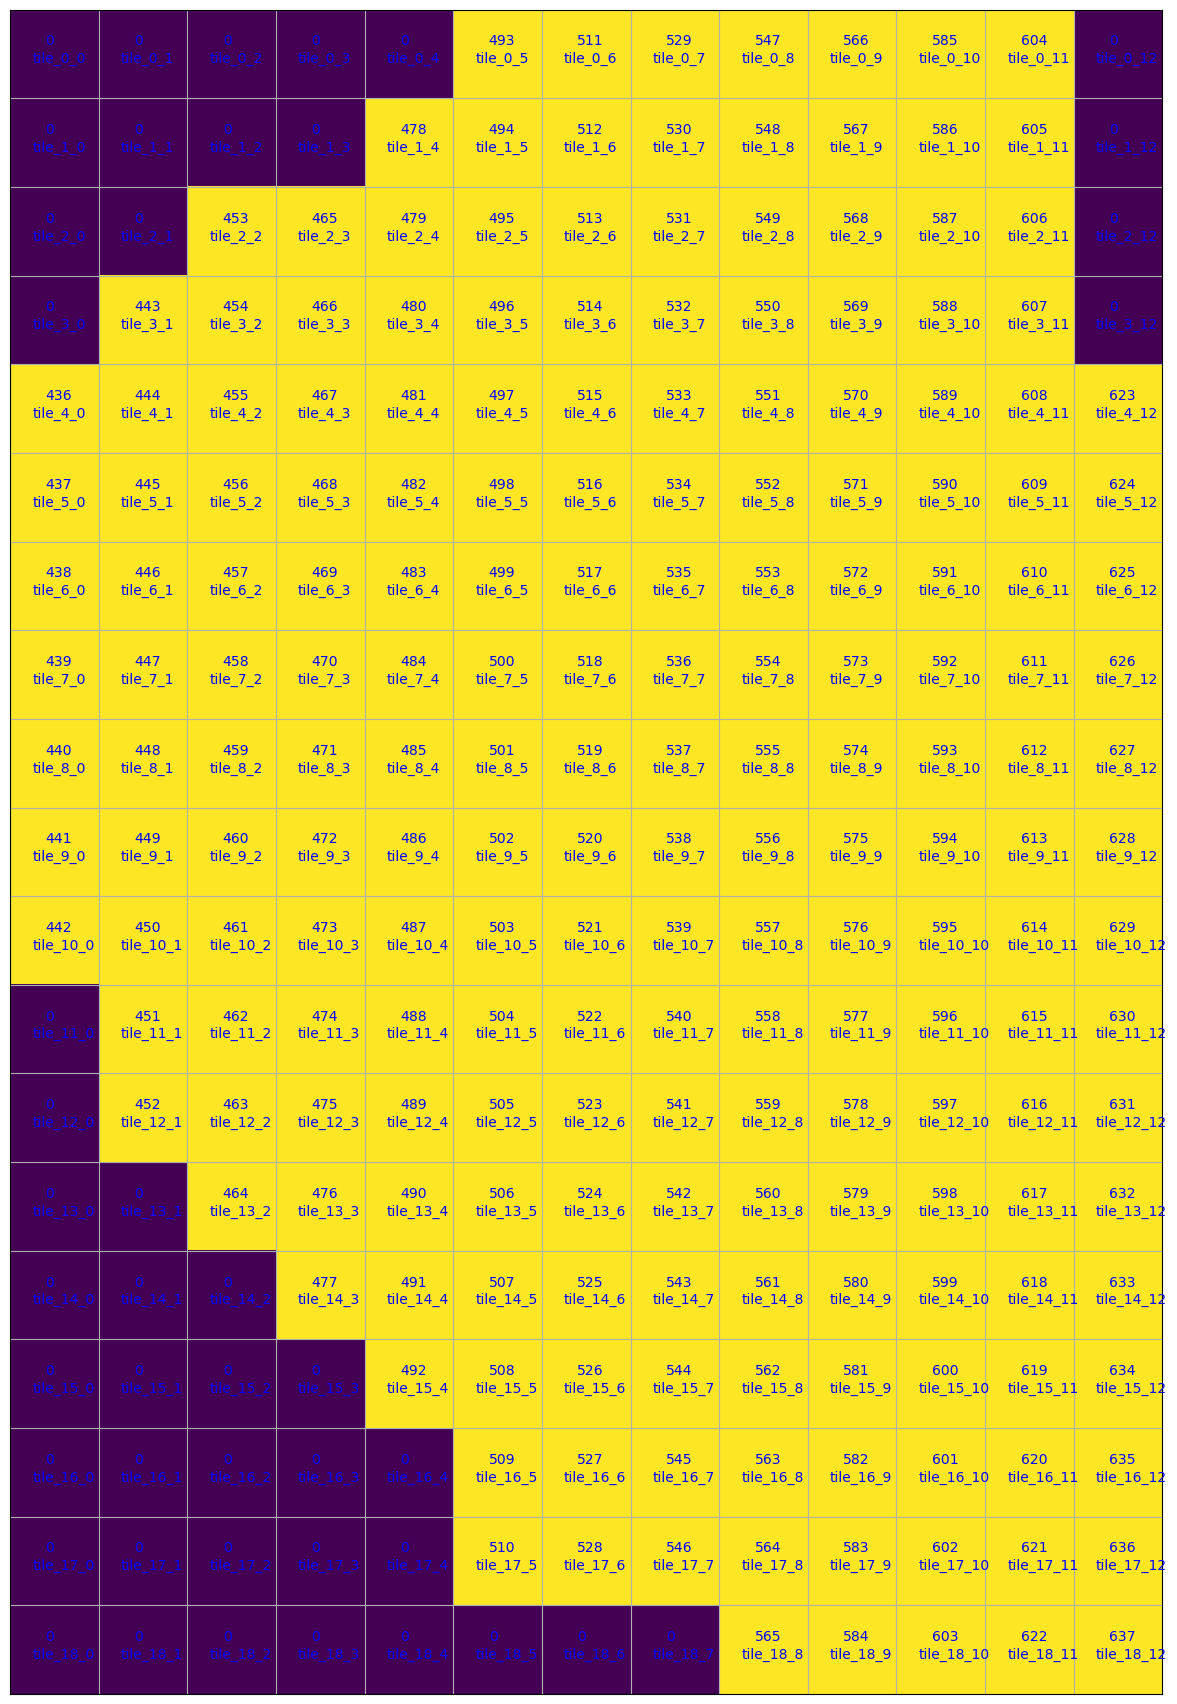

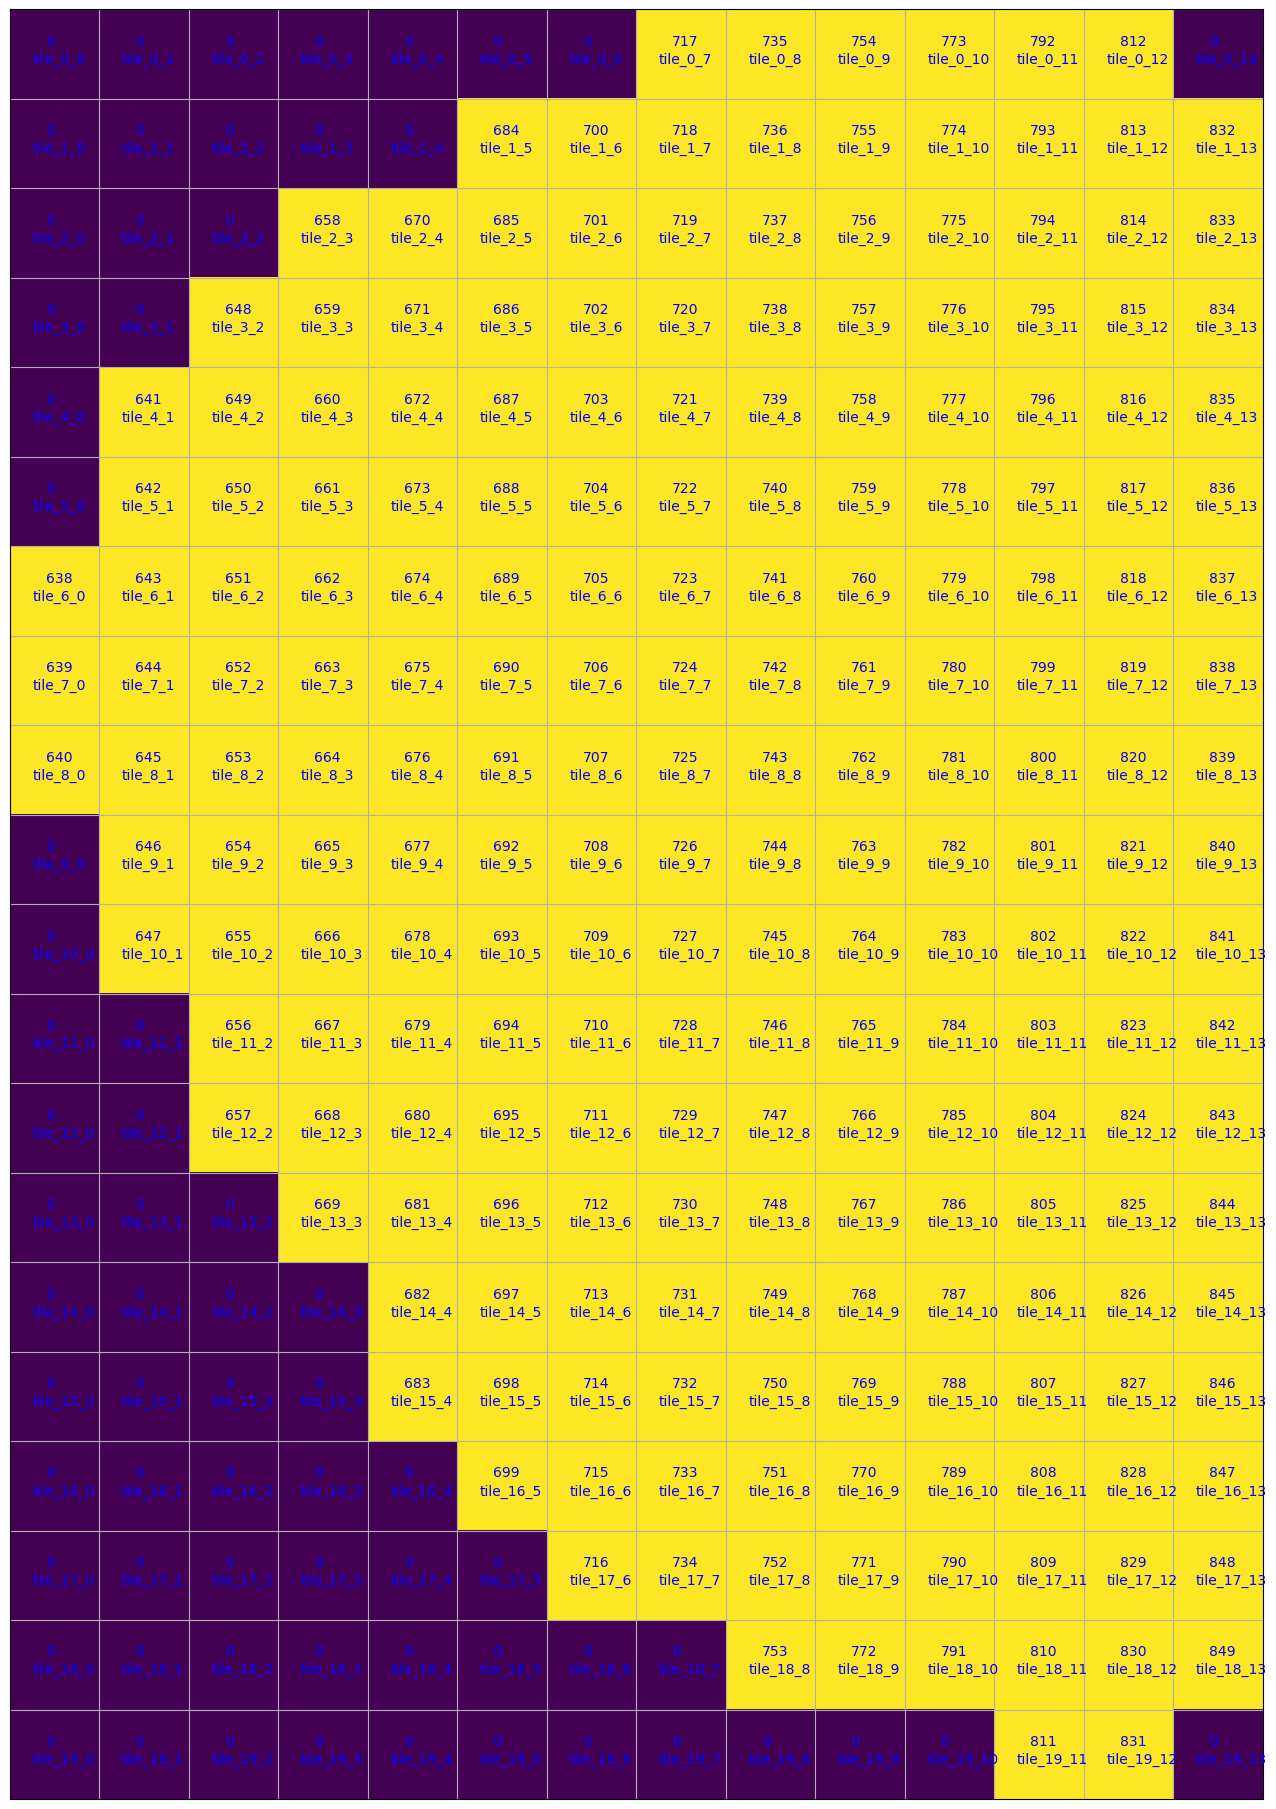

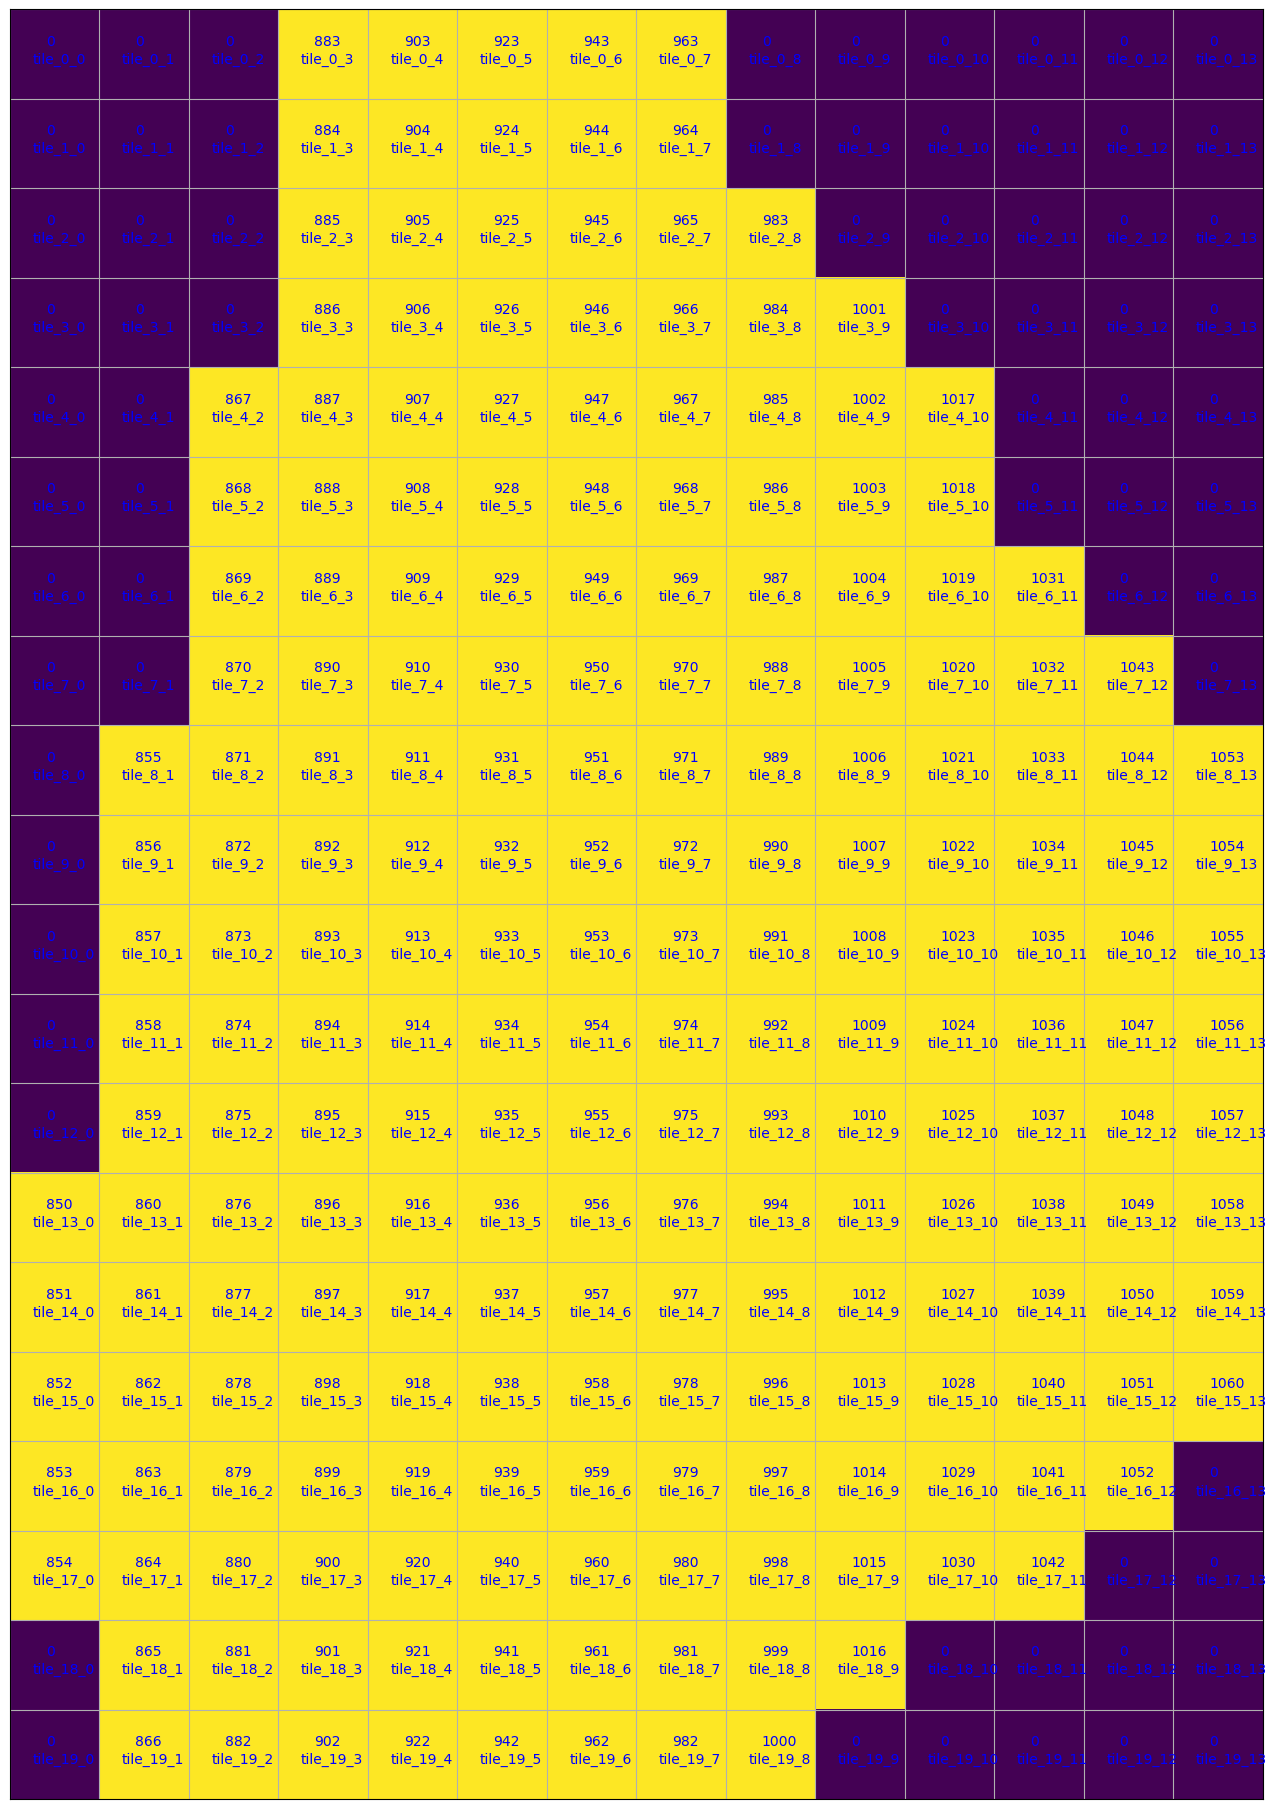

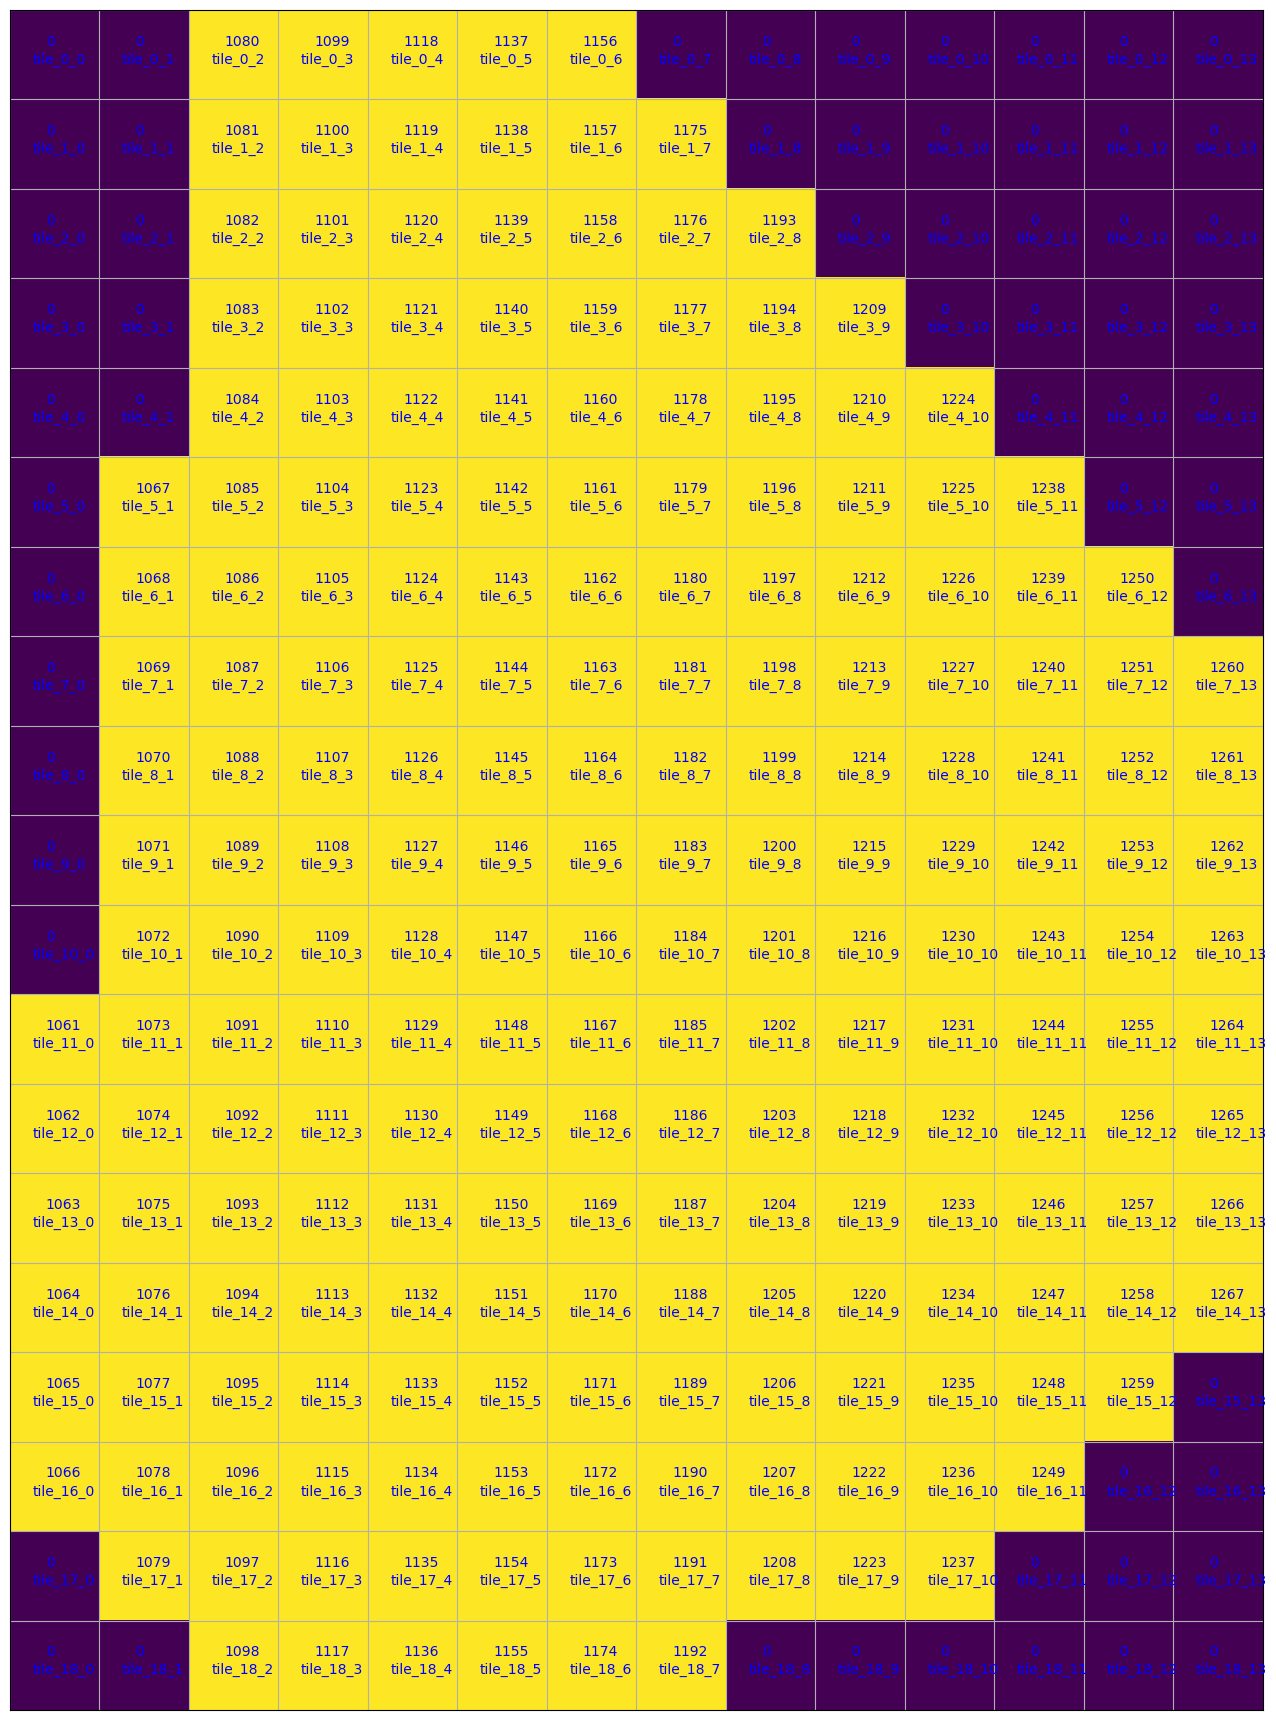

In [4]:
output_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-03-22-Mingrui-PFC-test/images/fused'
for i in tqdm(maf_files):
    current_sample = i.split('.')[0]
    current_output_path = os.path.join(output_path, current_sample)
    if not os.path.exists(current_output_path):
        os.mkdir(current_output_path)
    
    df, n_layers = generate_stitching_order(os.path.join(input_path, i), current_output_path)


In [5]:
from tifffile import imwrite

x, y, z = [2048, 2048, 45]
output_dir = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-03-22-Mingrui-PFC-test/images/fused'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    

# Create blank tile
blank_2d = np.zeros((x, y), dtype=np.uint8)
blank_3d = np.zeros((z, x, y), dtype=np.uint8)

# Save blank tile to output directory
output_2d = os.path.join(output_dir, "2D")
if not os.path.exists(output_2d):
    os.mkdir(output_2d)

output_3d = os.path.join(output_dir, "3D")
if not os.path.exists(output_3d):
    os.mkdir(output_3d)

imwrite(os.path.join(output_2d, 'blank.tif'), blank_2d)
imwrite(os.path.join(output_3d, 'blank.tif'), blank_3d)

  0%|          | 0/12 [00:00<?, ?it/s]

sample1


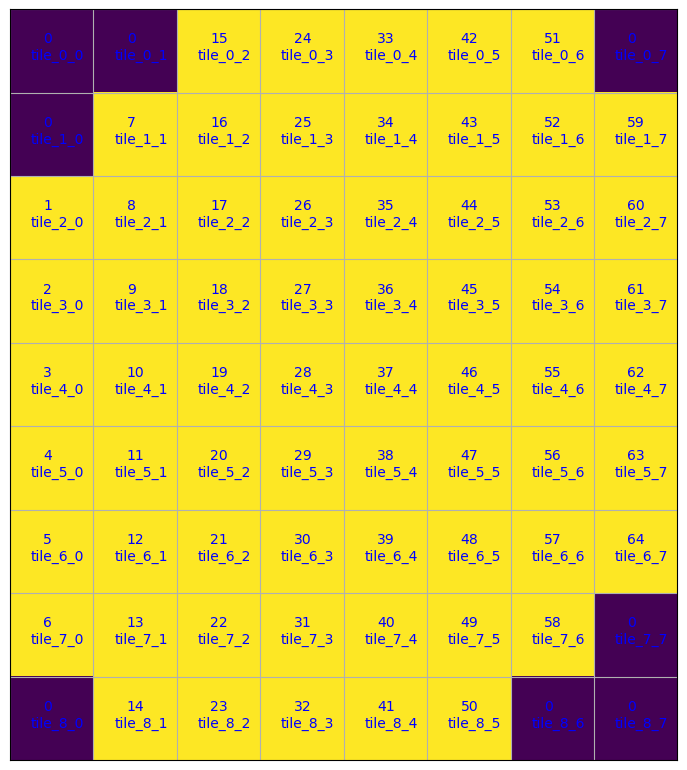

  0%|          | 0/72 [00:00<?, ?it/s]

sample2


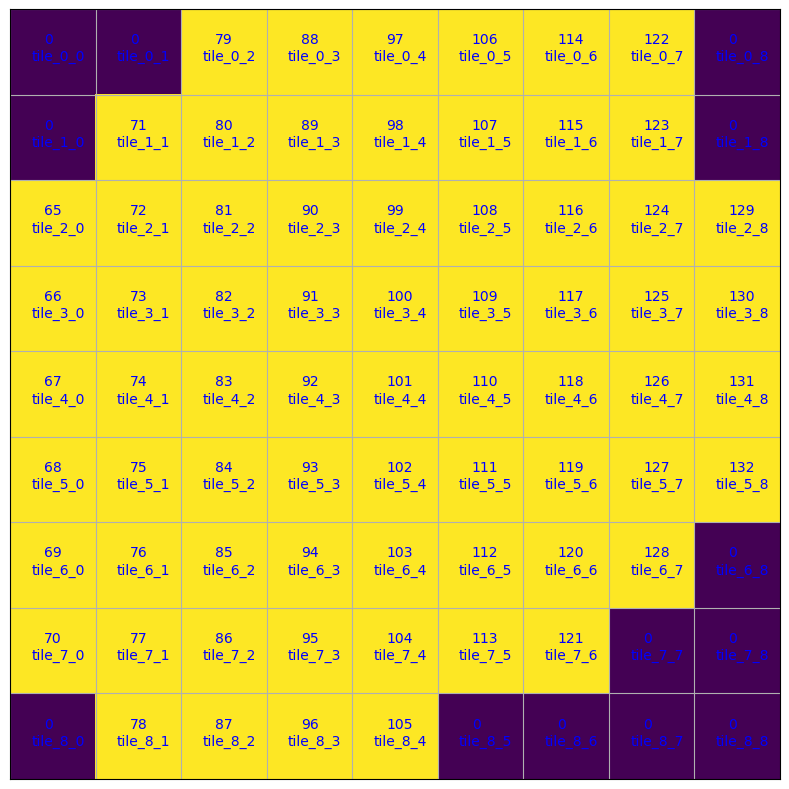

  0%|          | 0/81 [00:00<?, ?it/s]

sample3


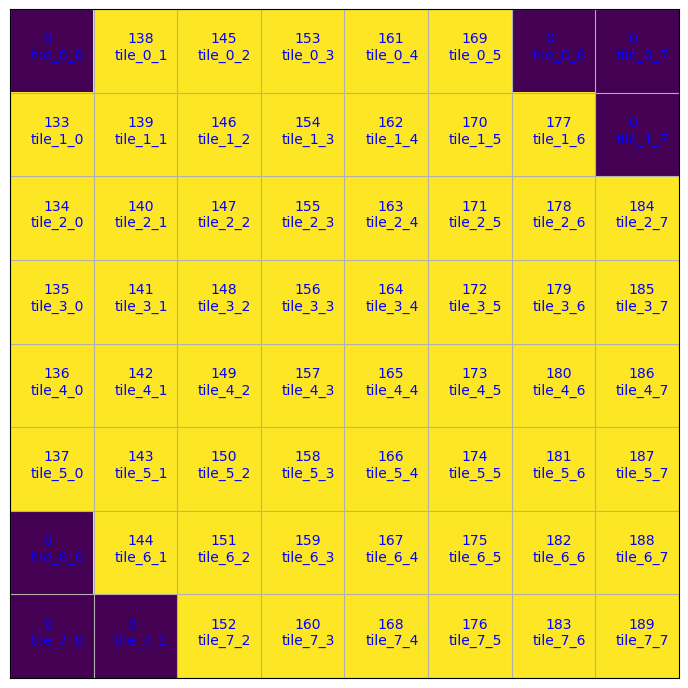

  0%|          | 0/64 [00:00<?, ?it/s]

sample4


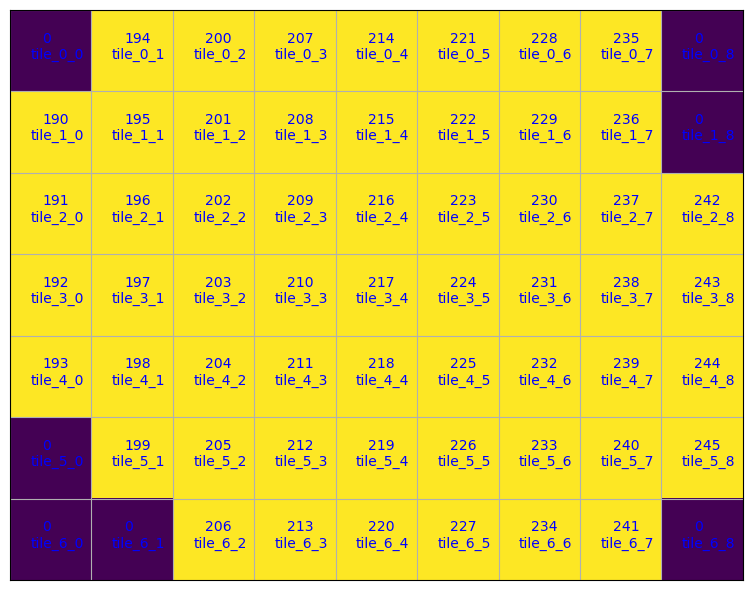

  0%|          | 0/63 [00:00<?, ?it/s]

sample5


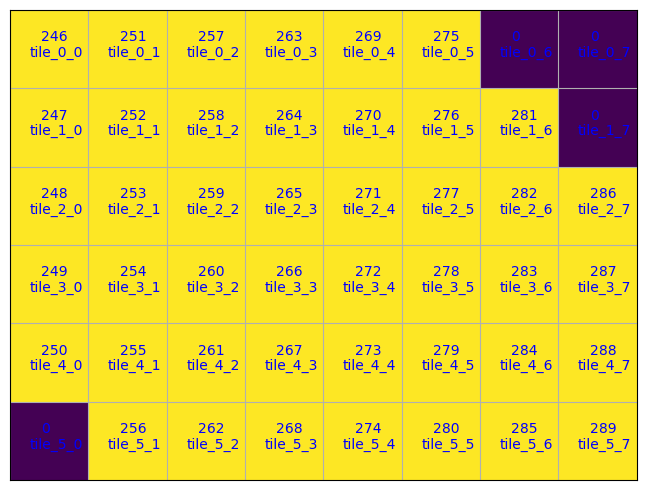

  0%|          | 0/48 [00:00<?, ?it/s]

sample6


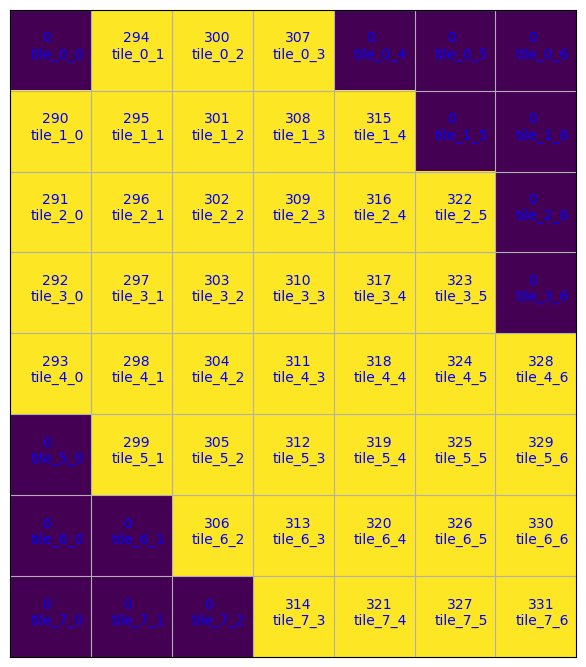

  0%|          | 0/56 [00:00<?, ?it/s]

sample7


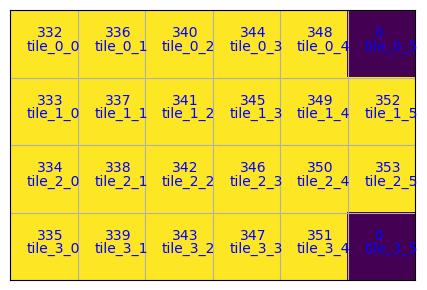

  0%|          | 0/24 [00:00<?, ?it/s]

sample8


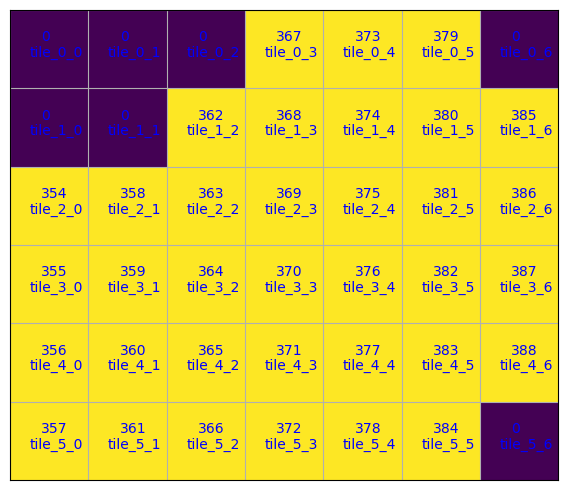

  0%|          | 0/42 [00:00<?, ?it/s]

sample9


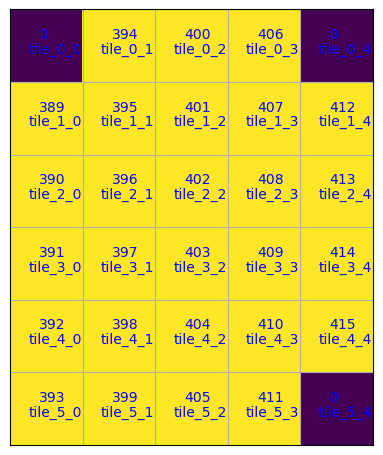

  0%|          | 0/30 [00:00<?, ?it/s]

sample10


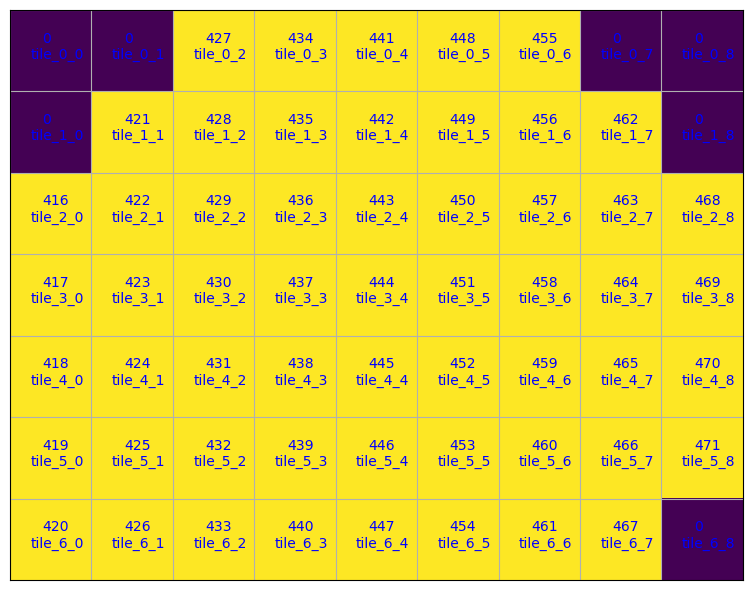

  0%|          | 0/63 [00:00<?, ?it/s]

sample11


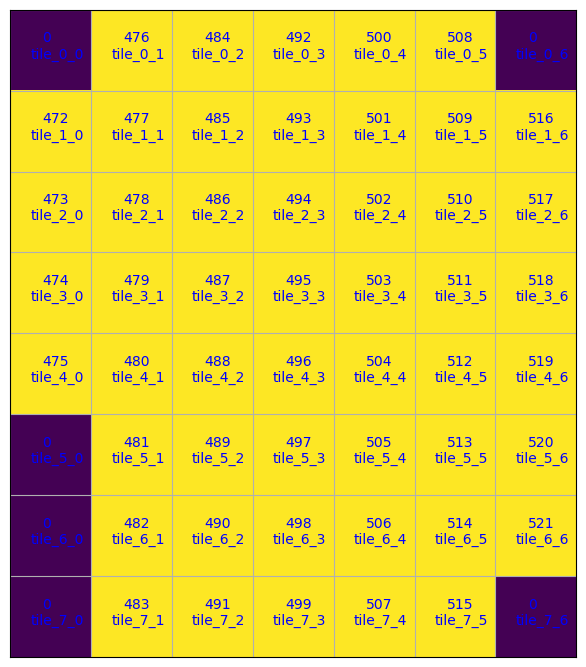

  0%|          | 0/56 [00:00<?, ?it/s]

sample12


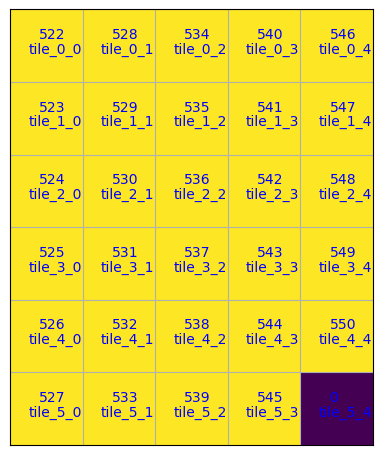

  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
from tqdm.notebook import tqdm
import shutil

base_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-03-08-Hongyu-Covid_LN/'
samples = [f.split(".")[0] for f in maf_files]

for i, current_sample in enumerate(tqdm(samples)):
    print(current_sample)
    current_output_path = os.path.join(base_path, f'images/fused/3D/{current_sample}')
    if not os.path.exists(current_output_path):
        os.mkdir(current_output_path)

    current_grid_fname = os.path.join(current_output_path, 'grid.tif')
    current_df, n_layers = generate_stitching_order(os.path.join(input_path, f"{current_sample}.maf"), current_grid_fname)
    current_df.to_csv(os.path.join(current_output_path, 'grid.csv'))

    x, y, z = [1496, 1496, n_layers]
    blank_3d = np.zeros((z, x, y), dtype=np.uint8)
    imwrite(os.path.join(current_output_path, 'blank.tif'), blank_3d)

    # input_ref_merged_path = os.path.join(base_path, 'images/ref_merged')
    input_dapi_merged_path = os.path.join(base_path, 'images/flamingo/DAPI')
    # input_flamingo_merged_path = os.path.join(base_path, 'images/flamingo/Flamingo')

    # current_ref_merged_output_path = os.path.join(current_output_path, 'ref_merged')
    # if not os.path.exists(current_ref_merged_output_path):
    #     os.mkdir(current_ref_merged_output_path)

    current_DAPI_output_path = os.path.join(current_output_path, 'DAPI')
    if not os.path.exists(current_DAPI_output_path):
        os.mkdir(current_DAPI_output_path)
        
    # current_Flamingo_output_path = os.path.join(current_output_path, 'Flamingo')
    # if not os.path.exists(current_Flamingo_output_path):
    #     os.mkdir(current_Flamingo_output_path)

    for j in tqdm(range(0, current_df.shape[0])):
        current_id = current_df.iloc[j, 2]
        current_grid = current_df.iloc[j, 3]
        current_position_id = f"Position{current_id:03}"

        # print(current_position_id, current_grid)
        if current_id == 0:
            src = os.path.join(base_path, 'images/fused/3D', current_sample, 'blank.tif')
            # dest_merged = os.path.join(current_ref_merged_output_path, f"{current_grid}.tif")
            dest_dapi = os.path.join(current_DAPI_output_path, f"tile_{j}.tif")
            # dest_flamingo = os.path.join(current_Flamingo_output_path, f"{current_grid}.tif")

            # shutil.copyfile(src, dest_merged)
            shutil.copyfile(src, dest_dapi)
            # shutil.copyfile(src, dest_flamingo)

            # os.symlink(src, dest_merged)
            # os.symlink(src, dest_dapi)
        else:
            # src_merged = os.path.join(input_ref_merged_path, f"{current_position_id}.tif")
            src_dapi = os.path.join(input_dapi_merged_path, f"{current_position_id}.tif")
            # src_flamingo = os.path.join(input_flamingo_merged_path, f"{current_position_id}.tif")

            # dest_merged = os.path.join(current_ref_merged_output_path, f"{current_grid}.tif")
            dest_dapi = os.path.join(current_DAPI_output_path, f"tile_{j}.tif")
            # dest_flamingo = os.path.join(current_Flamingo_output_path, f"{current_grid}.tif")

            # shutil.copyfile(src_merged, dest_merged)
            shutil.copyfile(src_dapi, dest_dapi)
            # shutil.copyfile(src_flamingo, dest_flamingo)

            # os.symlink(src_merged, dest_merged)
            # os.symlink(src_dapi, dest_dapi)

Z:\Data\Analyzed\2024-03-12-Mingrui-PFC\images\fused\3D\sample2\DAPI/*.tif

  0%|          | 0/1 [00:00<?, ?it/s]

sample1


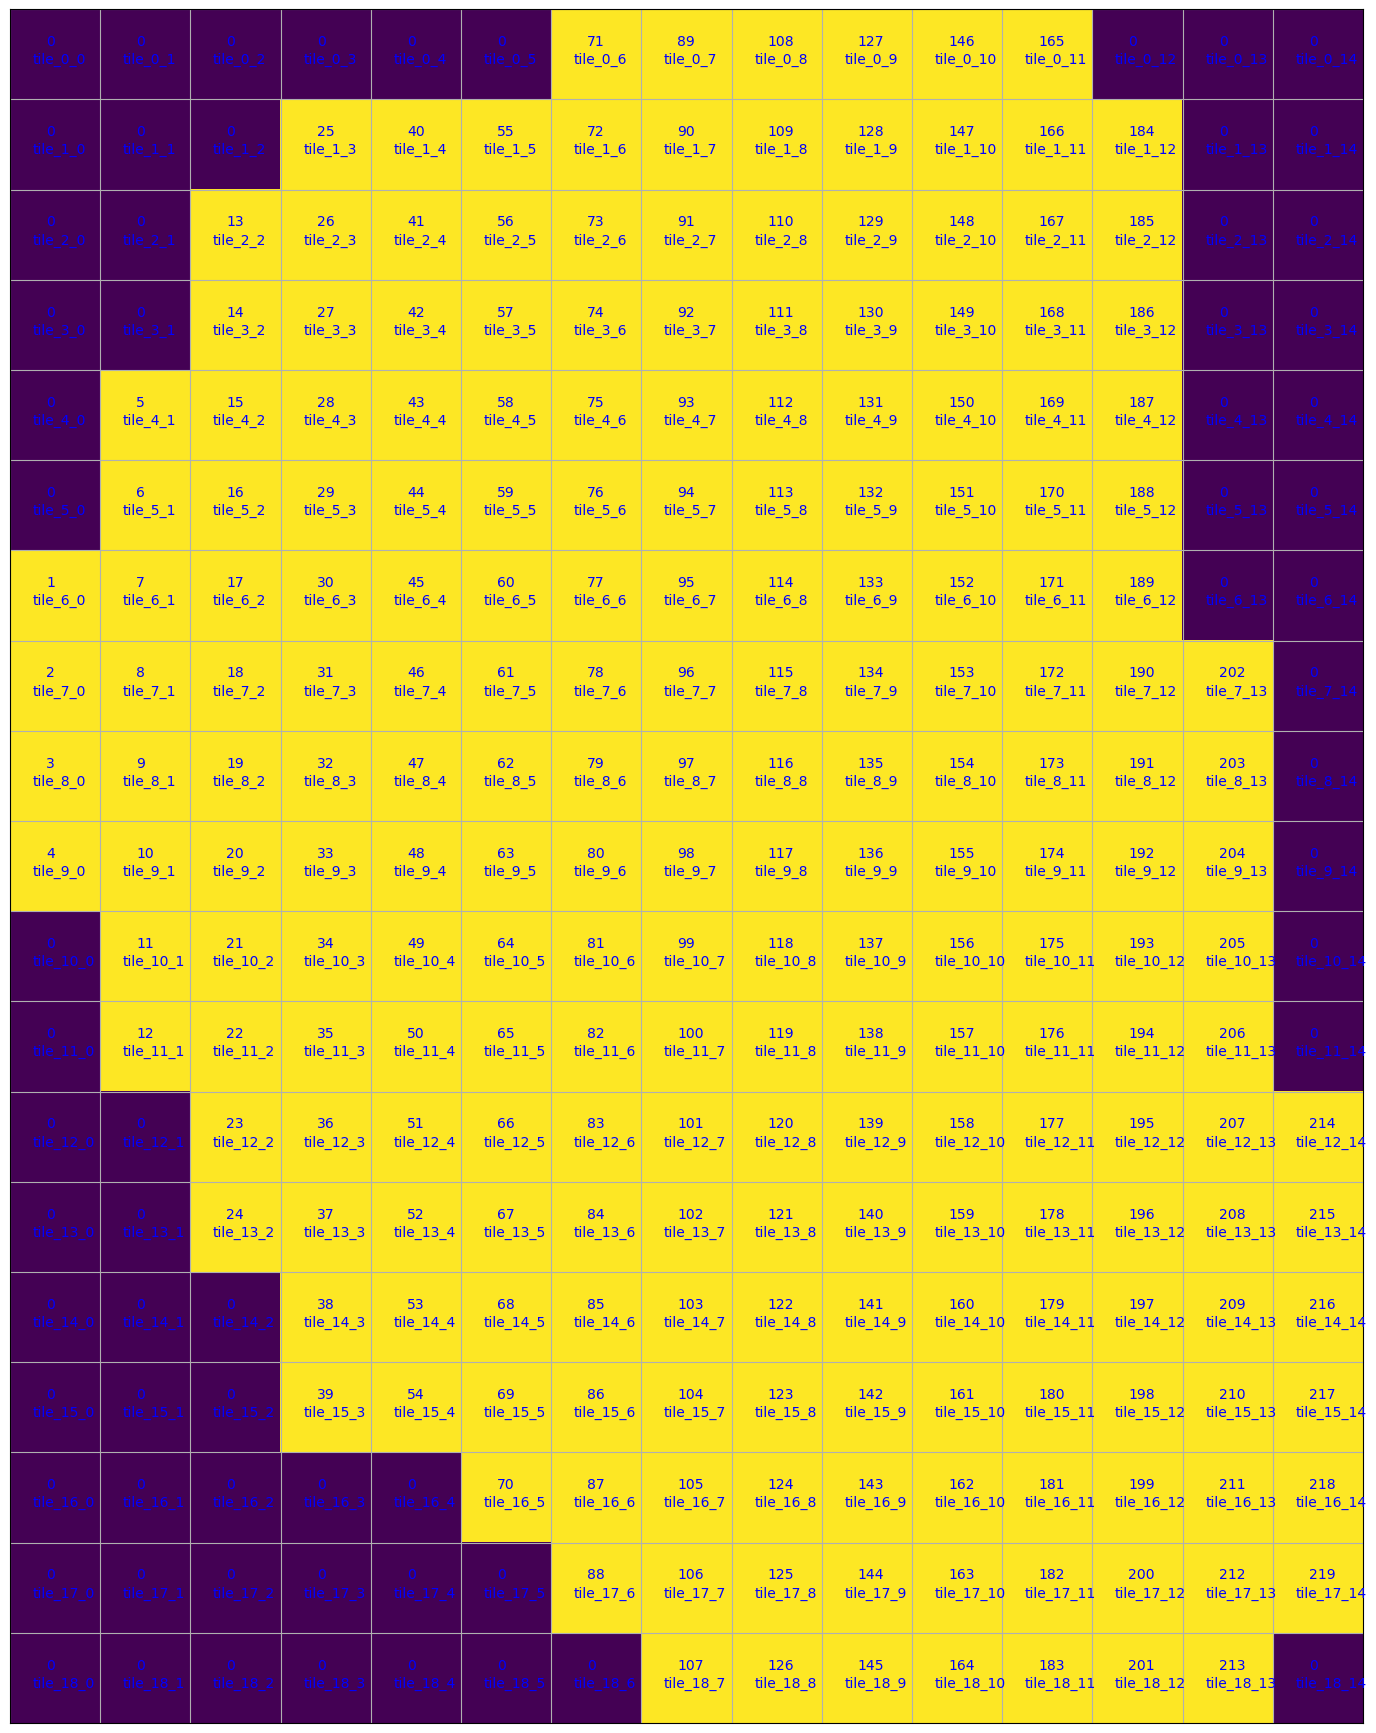

  0%|          | 0/285 [00:00<?, ?it/s]

In [9]:
from tqdm.notebook import tqdm
import shutil

base_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-03-22-Mingrui-PFC-test/'
samples = [f.split(".")[0] for f in maf_files]

# for i, current_sample in enumerate(tqdm(samples)):
for i, current_sample in enumerate(tqdm(['sample1'])):
    print(current_sample)
    current_output_path = os.path.join(base_path, f'images/fused/2D/{current_sample}')
    if not os.path.exists(current_output_path):
        os.mkdir(current_output_path)

    current_grid_fname = os.path.join(current_output_path, 'grid.tif')
    current_df, n_layers = generate_stitching_order(os.path.join(input_path, f"{current_sample}.maf"), current_grid_fname)
    current_df.to_csv(os.path.join(current_output_path, 'grid.csv'))

    # input_ref_merged_path = os.path.join(base_path, 'images/ref_merged_MAX')
    input_dapi_merged_path = os.path.join(base_path, 'images/DAPI_MAX')
    # input_flamingo_merged_path = os.path.join(base_path, 'images/flamingo/Flamingo_MAX')

    # current_ref_merged_output_path = os.path.join(current_output_path, 'ref_merged')
    # if not os.path.exists(current_ref_merged_output_path):
    #     os.mkdir(current_ref_merged_output_path)

    current_DAPI_output_path = os.path.join(current_output_path, 'DAPI')
    if not os.path.exists(current_DAPI_output_path):
        os.mkdir(current_DAPI_output_path)
        
    # current_Flamingo_output_path = os.path.join(current_output_path, 'Flamingo')
    # if not os.path.exists(current_Flamingo_output_path):
    #     os.mkdir(current_Flamingo_output_path)

    for j in tqdm(range(0, current_df.shape[0])):
        current_id = current_df.iloc[j, 2]
        current_grid = current_df.iloc[j, 3]
        current_position_id = f"Position{current_id:03}"

        # print(current_position_id, current_grid)
        if current_id == 0:
            src = os.path.join(base_path, 'images/fused/2D', 'blank.tif')
            # dest_merged = os.path.join(current_ref_merged_output_path, f"{current_grid}.tif")
            dest_dapi = os.path.join(current_DAPI_output_path, f"{current_grid}.tif")
            # dest_flamingo = os.path.join(current_Flamingo_output_path, f"{current_grid}.tif")

            # shutil.copyfile(src, dest_merged)
            shutil.copyfile(src, dest_dapi)
            # shutil.copyfile(src, dest_flamingo)

            # os.symlink(src, dest_merged)
            # os.symlink(src, dest_dapi)
        else:
            # src_merged = os.path.join(input_ref_merged_path, f"{current_position_id}.tif")
            src_dapi = os.path.join(input_dapi_merged_path, f"{current_position_id}.tif")
            # src_flamingo = os.path.join(input_flamingo_merged_path, f"{current_position_id}.tif")

            # dest_merged = os.path.join(current_ref_merged_output_path, f"{current_grid}.tif")
            dest_dapi = os.path.join(current_DAPI_output_path, f"{current_grid}.tif")
            # dest_flamingo = os.path.join(current_Flamingo_output_path, f"{current_grid}.tif")

            # shutil.copyfile(src_merged, dest_merged)
            shutil.copyfile(src_dapi, dest_dapi)
            # shutil.copyfile(src_flamingo, dest_flamingo)

            # os.symlink(src_merged, dest_merged)
            # os.symlink(src_dapi, dest_dapi)

In [33]:
import pandas as pd
df1 = pd.read_excel('/home/unix/jiahao/wanglab/jiahao/test/41592_2023_1829_MOESM3_ESM.xlsx', sheet_name='Supplementary Table 1', header=1)
df2 = pd.read_excel('/home/unix/jiahao/wanglab/jiahao/test/41592_2023_1829_MOESM3_ESM.xlsx', sheet_name='Supplementary Table 2', header=1)
df3 = pd.read_excel('/home/unix/jiahao/wanglab/jiahao/test/table_S4.xlsx', sheet_name='Sheet1', header=0)


In [36]:
df1

,Gene,Cell-cycle marker,Correlated expression group,Kinetic cluster,m6A label
0,CCNF,G2_M,NaN,5.0,m6A
1,CKS2,G2_M,NaN,NaN,non m6A
2,KIF23,G2_M,4.0,1.0,non m6A
3,CKS1B,G2_M,4.0,NaN,NaN
4,CDK1,G2_M,4.0,5.0,non m6A
...,...,...,...,...,...
993,PTRH2,NaN,NaN,5.0,m6A
994,CBX4,NaN,1.0,1.0,m6A
995,NDUFS4,NaN,NaN,5.0,NaN
996,NDUFS7,NaN,NaN,1.0,non m6A


In [45]:
kc_4 = df1.loc[df1['Kinetic cluster'] == 4, 'Gene'].to_list()
kc4_negative_gamma = df2.loc[(df2['gene'].isin(kc_4)) & (df2['G1_gamma'] < 0), 'gene'].to_list()

In [49]:
negative_gamma = df2.loc[(df2['G1_gamma'] < 0), 'gene'].to_list()

In [101]:
ltm = df3.loc[df3['LTM'] != '-', 'Genes'].to_list()
ltm_1 = df3.loc[df3['LTM'] != 1, 'Genes'].to_list()
ltm_2 = df3.loc[df3['LTM'] != 2, 'Genes'].to_list()
ltm_3 = df3.loc[df3['LTM'] != 3, 'Genes'].to_list()
ltm_4 = df3.loc[df3['LTM'] != 4, 'Genes'].to_list()
ltm_5 = df3.loc[df3['LTM'] != 5, 'Genes'].to_list()
non_ltm = df3.loc[df3['LTM'] == '-', 'Genes'].to_list()

In [112]:
for i in negative_gamma:
    if i in ltm:
        print(i)

UBE2C
ABCC1
ADCY9
ATP2B4
BACE2
COX6C
CPD
CTNNA1
DAG1
DNAJC1
DSCC1
FAF2
FAT1
FSTL1
GLG1
GPR161
ICMT
IGF1R
IQGAP1
LAMB1
LAMC1
LGR4
LRP1
MAP2K4
MGAT5
NFE2L1
PCYOX1
PLXNB2
PRSS23
PWP2
RPS6KB1
RXRA
SCARA3
SND1
SPAG5
SRRM2
TAPBP
TMEM186
TRAPPC1
WDR83OS


In [53]:
len(set(negative_gamma))

218

In [113]:
len(set(ltm))

186

In [123]:
kc4_ltm = list(set(kc4_negative_gamma) & set(ltm))
df3.loc[df3['Genes'].isin(kc4_ltm), :]

,Genes,RTM,LTM,Proximity ribosome profiling,APEX-RIP,ER reads percentage in RIBOmap
0,UBE2C,3,1,False,False,0.262843
4,BACE2,-,1,False,TURE,0.433620
13,DSCC1,1,1,False,False,0.300156
25,MAP2K4,-,1,False,False,0.314478
45,TAPBP,-,1,False,TURE,0.366580
63,DAG1,-,2,TURE,TURE,0.425374
120,ATP2B4,-,4,TURE,TURE,0.399654
142,PCYOX1,-,4,TURE,TURE,0.463047
143,PLXNB2,-,4,TURE,TURE,0.433199
156,ADCY9,-,5,False,TURE,0.338432


In [122]:
df3

,Genes,RTM,LTM,Proximity ribosome profiling,APEX-RIP,ER reads percentage in RIBOmap
0,UBE2C,3,1,False,False,0.262843
1,ADPRHL2,-,1,False,False,0.301090
2,ALDH18A1,2,1,False,False,0.396067
3,ARID1B,-,1,False,False,0.280411
4,BACE2,-,1,False,TURE,0.433620
...,...,...,...,...,...,...
976,ZRANB1,-,-,False,False,0.306510
977,ZSCAN12,-,-,False,False,0.342183
978,ZSCAN29,-,-,False,False,0.315346
979,ZXDC,-,-,False,False,0.284250


In [117]:
len(set(kc4_negative_gamma) & set(ltm))

14

In [102]:
len(set(negative_gamma) & set(non_ltm)) / len(set(non_ltm))

0.22138364779874214

In [48]:
14/109

0.12844036697247707

In [59]:
df2

,gene,G1_alpha,G1S_alpha,G2M_alpha,G1_beta,G1S_beta,G2M_beta,G1_lambda,G1S_lambda,G2M_lambda,G1_gamma,G1S_gamma,G2M_gamma
0,AARS,0.669632,0.642221,0.617305,0.172937,0.161282,0.176313,0.036990,0.042756,0.027567,0.016646,-0.001102,0.003308
1,ASXL1,0.527318,0.499530,0.512074,0.138189,0.104613,0.122215,0.010148,0.025976,0.028871,0.005781,0.008425,0.004312
2,COX7B,0.933919,0.878731,0.750639,0.114964,0.083814,0.087841,0.017817,0.026021,0.019225,-0.001913,0.008572,0.002191
3,CTGF,3.946460,4.067175,4.627244,0.278763,0.313473,0.342398,-0.016772,-0.019237,-0.021034,-0.007319,0.000269,0.008767
4,EME2,0.534748,0.608784,0.520202,0.149239,0.200522,0.169296,0.040576,0.016673,0.025393,0.004493,0.002100,0.007680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,ZRANB1,0.441543,0.374589,0.365266,0.119825,0.093123,0.093309,0.015414,0.033849,0.028359,0.001380,0.000654,0.005434
796,ZSCAN12,0.089938,0.094732,0.074914,0.178036,0.179357,0.165638,0.106383,0.031574,0.047102,-0.012621,0.005355,0.021485
797,ZSCAN29,0.273388,0.184417,0.238502,0.164995,0.178400,0.167756,0.070095,0.032595,0.030226,0.005553,0.007549,0.004060
798,ZXDC,0.300287,0.263683,0.270644,0.150965,0.116944,0.166671,0.013014,0.000150,0.020355,0.010957,0.003955,0.021924


In [114]:
ltm_kinetic = df2.loc[df2['gene'].isin(ltm), :]

In [115]:
ltm_kinetic.loc[(ltm_kinetic['G1_gamma'] < 0) | (ltm_kinetic['G1S_gamma'] < 0) | (ltm_kinetic['G2M_gamma'] < 0), :]

,gene,G1_alpha,G1S_alpha,G2M_alpha,G1_beta,G1S_beta,G2M_beta,G1_lambda,G1S_lambda,G2M_lambda,G1_gamma,G1S_gamma,G2M_gamma
17,UBE2C,0.201926,0.195311,0.394866,0.162552,0.063887,0.082529,0.057914,0.047166,0.047972,-0.041522,-0.006926,0.000104
21,ABCC1,1.232616,1.291538,1.233770,0.069909,0.094445,0.098546,0.013861,0.002896,0.023936,-0.004472,-0.004000,-0.001782
31,ADCY9,0.604064,0.425580,0.373089,0.126256,0.125872,0.128664,0.039177,0.028795,0.020923,-0.001260,-0.005359,0.002549
39,AHNAK,0.807242,0.653527,0.661530,0.145885,0.106836,0.108840,0.024558,0.019946,0.024846,0.008613,-0.001495,0.003402
42,AKAP1,0.677608,0.677094,0.598758,0.092185,0.123181,0.116660,0.033891,0.009897,0.016486,0.003966,-0.009533,-0.003993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,TOR1B,0.295434,0.289298,0.310311,0.090665,0.078524,0.105765,0.027415,0.038598,0.025302,0.007589,0.000681,-0.000944
699,TRAK1,0.643038,0.704123,0.630943,0.117658,0.125586,0.111520,0.023111,0.014012,0.026415,0.006113,-0.000167,0.010246
700,TRAPPC1,1.939287,1.982734,1.865994,0.112878,0.120576,0.124541,0.020491,0.030081,0.028863,-0.001010,0.005968,0.000733
711,TSPAN3,1.569637,1.584428,1.480320,0.113859,0.143845,0.149477,0.016579,0.019127,0.025643,0.008354,0.011300,-0.000651


In [68]:
import seaborn as sns

<AxesSubplot: ylabel='gene'>

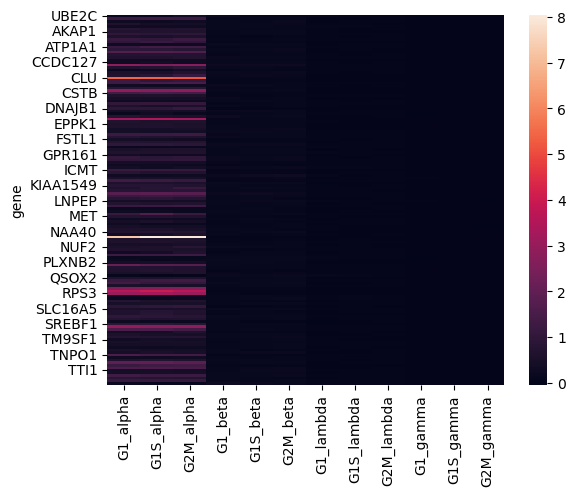

In [70]:
ltm_kinetic.index = ltm_kinetic['gene']
ltm_kinetic = ltm_kinetic.drop(columns=['gene'])


In [76]:
ltm_kinetic

,G1_alpha,G1S_alpha,G2M_alpha,G1_beta,G1S_beta,G2M_beta,G1_lambda,G1S_lambda,G2M_lambda,G1_gamma,G1S_gamma,G2M_gamma
gene,,,,,,,,,,,,
UBE2C,0.201926,0.195311,0.394866,0.162552,0.063887,0.082529,0.057914,0.047166,0.047972,-0.041522,-0.006926,0.000104
ABCC1,1.232616,1.291538,1.233770,0.069909,0.094445,0.098546,0.013861,0.002896,0.023936,-0.004472,-0.004000,-0.001782
ADCY3,0.242796,0.239598,0.246010,0.126446,0.104536,0.148422,0.020540,0.037324,0.040323,0.017213,0.011388,0.003872
ADCY9,0.604064,0.425580,0.373089,0.126256,0.125872,0.128664,0.039177,0.028795,0.020923,-0.001260,-0.005359,0.002549
ADPRHL2,0.281780,0.304312,0.255886,0.120556,0.123211,0.113602,0.056430,0.054779,0.027295,0.001671,0.015585,0.012100
...,...,...,...,...,...,...,...,...,...,...,...,...
TXNDC15,0.381880,0.443427,0.416619,0.122079,0.145504,0.133628,0.004535,0.033558,0.025725,0.010286,0.006670,0.000891
USP9X,1.342725,1.207861,1.214341,0.144438,0.147772,0.152488,0.037818,0.037615,0.037085,0.002888,0.002491,0.004579
WDR83OS,0.820819,0.744730,0.705404,0.132576,0.096161,0.084292,0.019247,0.025454,0.025462,-0.002232,0.005129,0.002073


In [90]:
df = ltm_kinetic.loc[:, ['G1_alpha', 'G1S_alpha', 'G2M_alpha']]
df_norm_col=df.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

<AxesSubplot: ylabel='gene'>

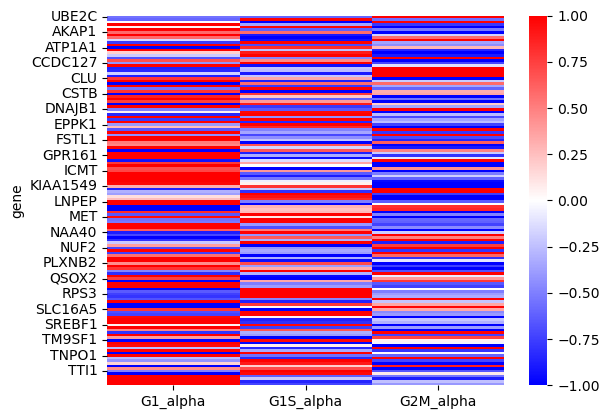

In [91]:
sns.heatmap(df_norm_col, cmap='bwr', vmin=-1, vmax=1)